In [1]:
import pandas as pd
import numpy as np

In [134]:
df = pd.read_csv("./dataSet.csv", low_memory=False)

df = df.drop(["season", "league", "Unnamed: 2", "name", "position1", "position2", "Apps"], axis=1)
df = df.replace(["-"], 0)

In [135]:
df.head()

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,34,2881,21,8.71,0.6,0.2,0.6,0,0,0.5,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
1,27,90,0,7.54,1,2,0,1,9,1,...,0,0,0,0,0,12,75,0,1,0
2,29,3091,3,7.47,2.7,1.9,2.5,0.1,1.9,1.7,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0
3,33,3155,8,7.44,0.5,0.2,0.6,0,0.8,0.4,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0,1.4,0.1
4,34,2002,8,7.33,0.1,0,0.5,0,0.4,0.4,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0


In [136]:
for i in range(0, 26):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17175 entries, 0 to 17174
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       17173 non-null  float64
 1   Mins      17173 non-null  float64
 2   Assists   17173 non-null  float64
 3   Rating    17173 non-null  float64
 4   Tackles   17173 non-null  float64
 5   Inter     17172 non-null  float64
 6   Fouls     17173 non-null  float64
 7   Offsides  17173 non-null  float64
 8   Clear     17173 non-null  float64
 9   Drb       17173 non-null  float64
 10  Blocks    17173 non-null  float64
 11  OwnG      17173 non-null  float64
 12  Goals     17173 non-null  float64
 13  SpG       17173 non-null  float64
 14  KeyP      17173 non-null  float64
 15  Drb.1     17173 non-null  float64
 16  Fouled    17173 non-null  float64
 17  Off       17173 non-null  float64
 18  Disp      17173 non-null  float64
 19  UnsTch    17173 non-null  float64
 20  KeyP.1    17173 non-null  fl

In [137]:
null_index = df[df.isnull().any(axis=1)].index
df[df.isnull().any(axis=1)]

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,35.0,2884.0,2.4,7.48,0.5,NaN,1.1,0.0,0.9,0.3,...,1.0,1.4,0.5,1.1,1.5,22.0,69.9,0.1,1.5,0.1
6632,29.0,90.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11115,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,5.0,60.0,0.0,0.0,0.0


In [138]:
df = df.drop(null_index)
df.reset_index(drop=True, inplace=True)

In [139]:
df

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,34.0,2881.0,21.0,8.71,0.6,0.2,0.6,0.0,0.0,0.5,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
1,27.0,90.0,0.0,7.54,1.0,2.0,0.0,1.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,12.0,75.0,0.0,1.0,0.0
2,29.0,3091.0,3.0,7.47,2.7,1.9,2.5,0.1,1.9,1.7,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0
3,33.0,3155.0,8.0,7.44,0.5,0.2,0.6,0.0,0.8,0.4,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1
4,34.0,2002.0,8.0,7.33,0.1,0.0,0.5,0.0,0.4,0.4,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17166,24.0,90.0,0.0,5.71,1.0,0.0,2.0,2.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,50.0,70.0,0.0,2.0,0.0
17167,34.0,90.0,1.0,5.55,0.0,1.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,49.0,81.6,0.0,2.0,0.0
17168,26.0,90.0,0.0,5.36,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,66.7,0.0,5.0,0.0
17169,26.0,87.0,2.0,5.29,1.0,1.0,2.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,1.0,30.0,80.0,0.0,2.0,0.0


In [140]:
from sklearn.model_selection import train_test_split
X_train, y_train = train_test_split(df, random_state=13)

In [141]:
X_train

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
10019,27.0,32.0,0.5,6.18,0.5,0.0,1.0,0.0,0.0,0.5,...,0.5,0.0,0.0,0.5,0.0,9.8,82.1,0.0,1.5,0.0
11092,20.0,20.0,0.5,6.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13542,22.0,824.0,0.6,6.37,1.7,1.5,1.1,0.1,1.2,1.4,...,0.2,0.4,0.0,0.4,0.6,33.1,73.6,0.3,2.8,0.0
7839,23.0,1825.0,2.1,6.84,0.8,0.6,0.3,0.0,0.1,0.7,...,1.0,0.6,0.1,1.1,0.3,49.1,80.8,0.1,2.1,0.0
10606,20.0,180.0,0.5,5.42,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,0.0,0.0,42.0,54.8,0.0,12.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,32.0,2097.0,1.0,6.72,0.0,0.1,0.0,0.0,0.6,0.0,...,0.2,0.0,0.0,0.0,0.0,25.9,56.8,0.0,5.6,0.0
866,33.0,2055.0,0.0,6.47,1.4,1.1,1.0,0.1,1.3,1.5,...,0.8,0.0,0.5,0.3,0.5,44.6,85.5,0.1,3.4,0.0
74,30.0,3167.0,6.0,6.88,0.7,0.4,0.8,0.1,0.4,0.6,...,1.3,0.1,1.4,1.0,2.2,57.4,88.4,1.3,3.5,0.1
14512,30.0,1097.0,0.9,6.44,1.4,1.2,1.1,0.1,0.7,0.5,...,0.3,1.4,0.2,0.8,0.6,16.3,67.7,0.8,1.2,0.0


In [142]:
y_train

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
17083,27.0,62.0,4.0,6.21,1.0,0.0,3.0,0.0,1.0,1.0,...,2.0,0.0,0.0,2.0,1.0,13.0,53.8,1.0,0.0,0.0
10629,32.0,2175.0,2.1,7.10,1.1,0.4,1.0,0.0,0.9,0.8,...,0.8,0.8,0.1,1.3,1.3,30.4,75.4,0.2,0.6,0.1
10088,20.0,21.0,0.0,5.92,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,33.3,0.0,0.0,0.0
7367,27.0,1173.0,1.6,6.84,2.3,1.3,1.0,0.2,1.1,0.7,...,1.0,1.4,0.0,0.7,1.0,15.3,62.5,0.1,0.5,0.0
5255,22.0,1796.0,3.0,6.32,0.4,0.1,1.1,0.0,0.1,0.2,...,0.8,0.2,1.5,1.5,0.5,6.9,61.6,0.1,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,30.0,1906.0,2.0,6.76,1.6,1.3,1.5,0.3,1.8,1.3,...,0.8,0.0,0.7,1.3,0.7,39.2,80.6,0.5,2.3,0.0
10147,26.0,450.0,3.8,6.99,1.6,0.6,1.8,0.0,0.6,1.2,...,1.4,1.4,0.0,1.6,1.4,37.2,75.2,1.0,2.7,0.0
981,25.0,142.0,0.0,6.31,0.2,0.2,0.8,0.0,0.0,0.4,...,1.4,0.0,0.4,0.8,0.4,7.6,73.7,0.0,0.0,0.0
8164,32.0,26.0,0.0,6.19,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,7.0,71.4,0.0,0.0,0.0


In [143]:
defensiveDF = ['Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG']
offensiveDF = ['Goals', 'Assists', 'SpG', 'KeyP', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch']
passingDF = ['Assists','KeyP','AvgP','PS%','Crosses','LongB','ThrB']

In [144]:
rest = ['Mins', 'Rating']

In [145]:
important_features_defen = ['Tackles', 'Inter', 'Blocks' ]
important_features_offen = ['Goals', 'Assists']

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\heejae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tackles'>

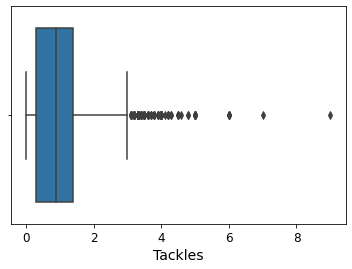

In [147]:
sns.boxplot('Tackles', data=X_train)

C:\heejae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inter'>

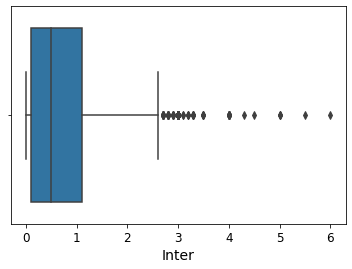

In [148]:
sns.boxplot('Inter', data=X_train)

C:\heejae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blocks'>

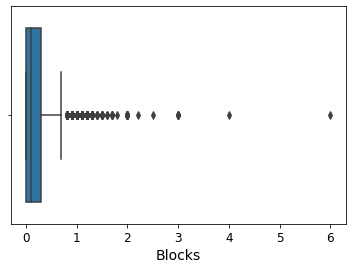

In [149]:
sns.boxplot('Blocks', data=X_train)

C:\heejae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Goals'>

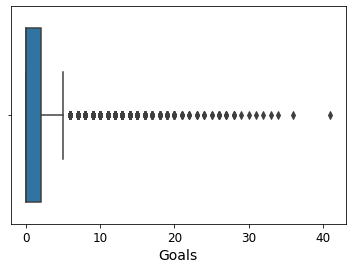

In [94]:
sns.boxplot('Goals', data=X_train)

C:\heejae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Assists'>

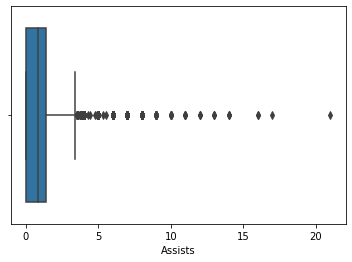

In [20]:
sns.boxplot('Assists', data=X_train)

<AxesSubplot:ylabel='Frequency'>

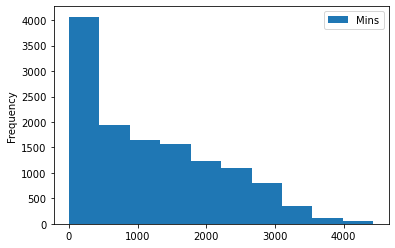

In [21]:
X_train[['Mins']].plot(kind='hist')

<AxesSubplot:ylabel='Count'>

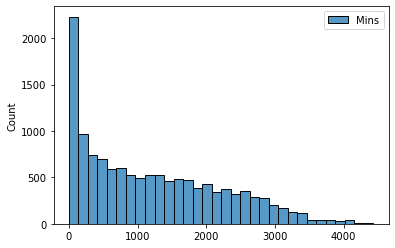

In [22]:
sns.histplot(X_train[['Mins']])

<AxesSubplot:ylabel='Count'>

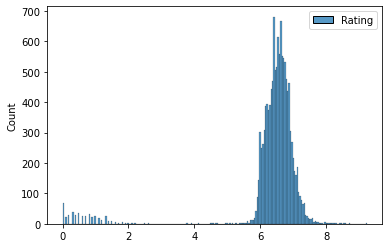

In [23]:
sns.histplot(X_train[['Rating']])

C:\heejae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mins', ylabel='Rating'>

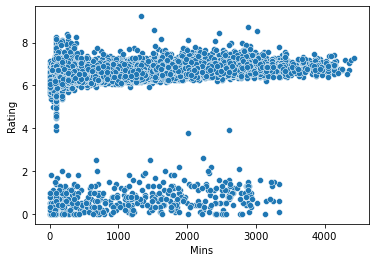

In [24]:
sns.scatterplot('Mins', 'Rating', data=X_train)

In [151]:
# X_train.to_csv("X_train.csv", index=False)

In [259]:
X_train = pd.read_csv('./X_train.csv')

In [260]:
X_train

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,27.0,32.0,0.5,6.18,0.5,0.0,1.0,0.0,0.0,0.5,...,0.5,0.0,0.0,0.5,0.0,9.8,82.1,0.0,1.5,0.0
1,20.0,20.0,0.5,6.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22.0,824.0,0.6,6.37,1.7,1.5,1.1,0.1,1.2,1.4,...,0.2,0.4,0.0,0.4,0.6,33.1,73.6,0.3,2.8,0.0
3,23.0,1825.0,2.1,6.84,0.8,0.6,0.3,0.0,0.1,0.7,...,1.0,0.6,0.1,1.1,0.3,49.1,80.8,0.1,2.1,0.0
4,20.0,180.0,0.5,5.42,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,0.0,0.0,42.0,54.8,0.0,12.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12873,32.0,2097.0,1.0,6.72,0.0,0.1,0.0,0.0,0.6,0.0,...,0.2,0.0,0.0,0.0,0.0,25.9,56.8,0.0,5.6,0.0
12874,33.0,2055.0,0.0,6.47,1.4,1.1,1.0,0.1,1.3,1.5,...,0.8,0.0,0.5,0.3,0.5,44.6,85.5,0.1,3.4,0.0
12875,30.0,3167.0,6.0,6.88,0.7,0.4,0.8,0.1,0.4,0.6,...,1.3,0.1,1.4,1.0,2.2,57.4,88.4,1.3,3.5,0.1
12876,30.0,1097.0,0.9,6.44,1.4,1.2,1.1,0.1,0.7,0.5,...,0.3,1.4,0.2,0.8,0.6,16.3,67.7,0.8,1.2,0.0


In [261]:
X_train = X_train[X_train['Mins']>500]
X_train.reset_index(drop=True, inplace=True)
X_train

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,22.0,824.0,0.6,6.37,1.7,1.5,1.1,0.1,1.2,1.4,...,0.2,0.4,0.0,0.4,0.6,33.1,73.6,0.3,2.8,0.0
1,23.0,1825.0,2.1,6.84,0.8,0.6,0.3,0.0,0.1,0.7,...,1.0,0.6,0.1,1.1,0.3,49.1,80.8,0.1,2.1,0.0
2,27.0,2580.0,1.3,6.77,1.8,2.0,1.1,0.3,1.8,0.7,...,0.6,1.2,0.1,0.5,0.8,24.3,77.8,0.9,1.1,0.0
3,27.0,1570.0,3.4,7.69,1.2,0.4,1.4,0.0,0.9,0.9,...,1.1,2.2,0.6,1.8,1.2,28.0,72.9,0.1,0.4,0.0
4,28.0,1067.0,1.2,0.40,0.9,0.8,0.8,0.1,0.4,0.9,...,0.9,0.6,0.0,0.4,2647.0,2.0,0.0,0.7,0.3,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,32.0,2097.0,1.0,6.72,0.0,0.1,0.0,0.0,0.6,0.0,...,0.2,0.0,0.0,0.0,0.0,25.9,56.8,0.0,5.6,0.0
8511,33.0,2055.0,0.0,6.47,1.4,1.1,1.0,0.1,1.3,1.5,...,0.8,0.0,0.5,0.3,0.5,44.6,85.5,0.1,3.4,0.0
8512,30.0,3167.0,6.0,6.88,0.7,0.4,0.8,0.1,0.4,0.6,...,1.3,0.1,1.4,1.0,2.2,57.4,88.4,1.3,3.5,0.1
8513,30.0,1097.0,0.9,6.44,1.4,1.2,1.1,0.1,0.7,0.5,...,0.3,1.4,0.2,0.8,0.6,16.3,67.7,0.8,1.2,0.0


In [211]:
# from sklearn.preprocessing import StandardScaler


# standard_scaler = StandardScaler()

# X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)

In [239]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [159]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 2)
# reduced = pd.DataFrame(pca.fit_transform(df_scaled))

In [160]:
# reduced

In [262]:
important_features_defen = ['Tackles', 'Inter', 'Blocks' ]
important_features_offen = ['Goals', 'Assists']
select = important_features_defen + important_features_offen
select

['Tackles', 'Inter', 'Blocks', 'Goals', 'Assists']

In [263]:
reduced = X_train[select]
# reduced = X_norm[select]

In [264]:
reduced

,Tackles,Inter,Blocks,Goals,Assists
0,1.7,1.5,0.5,0.0,0.6
1,0.8,0.6,0.0,7.0,2.1
2,1.8,2.0,0.3,0.0,1.3
3,1.2,0.4,0.1,11.0,3.4
4,0.9,0.8,0.0,0.0,1.2
...,...,...,...,...,...
8510,0.0,0.1,0.0,0.0,1.0
8511,1.4,1.1,0.2,0.0,0.0
8512,0.7,0.4,0.0,6.0,6.0
8513,1.4,1.2,0.3,0.0,0.9


In [265]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

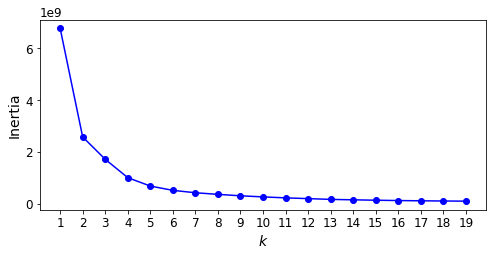

In [266]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.xticks(range(1, 20,1))
# plt.annotate('Elbow',
#              xy=(4, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.x_axis([1, 20])
# save_fig("inertia_vs_k_plot")
plt.show()

In [267]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]


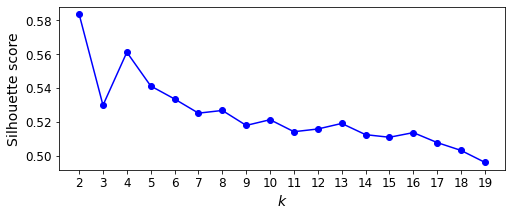

In [268]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20,1), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.xticks(range(2, 20,1))
plt.show()

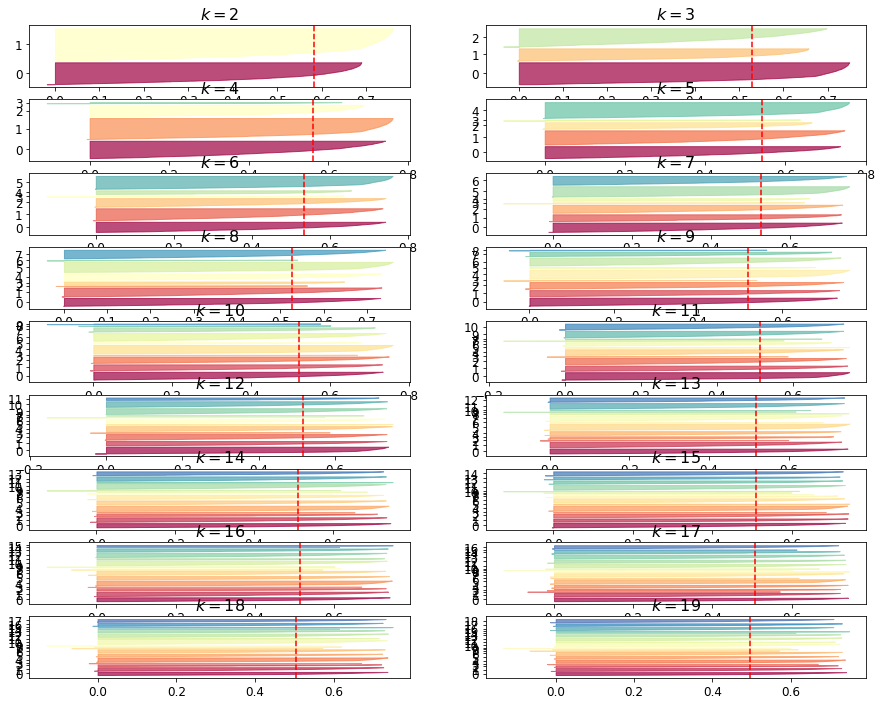

In [269]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.figure(figsize=(15, 12))

for k in (2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19):
    plt.subplot(9, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
#     if k in (3, 5):
#         plt.ylabel("Cluster")
    
#     if k in (5, 6):
#         plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#         plt.xlabel("Silhouette Coefficient")
#     else:
#         plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)